In [1]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import animation, rc

#from matplotlib.patches import Circle
from IPython.display import Latex

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Introduction

This module is intended to demonstrate some ideas in linear dynamics and chaos theory.  It follows closely the excellent explanations done by Dr. Richard Fitzgerald found [here](http://farside.ph.utexas.edu/teaching/329/lectures/node47.html) which is an excellent introduction and I recommend starting with that if you have time.   This page is mostly just an interactive manipulate version of his system that allows you to vary the parameters that carry the model from a well behaved predictable state to chaotic regimes.

Chaos is often thought of as synonymous with unpredictability or more accurately, high sensitivity to initial conditions.   This property is a result of non-linear terms in the system's equations of motions which amplify error exponentially as the system is integrated forward in time.

Our system is a pendulum consisting of a point mass attached to a center point with a rigid rod.    The mass is therefore constrained to a single degree of freedom which can be described as the angle theta.   Solving F=ma yields the following equation of motion:

$$
\\
m\ l\ \frac{d^2d\theta}{dt^2}\ + \  m\ g\ sin(\theta)\ = 0\\
\\
$$

Two things are added to this system.   The first is viscous fluid that dampens the pendulum by opposed the motion of mass with a force proportional to it's velocity.   To replace the lost energy and prevent the system from decaying to rest, a driving motor is applied to the fulcrum point which supplies a periodic torque to the pendulum of magnitude A and frequency \[Omega].     With these two additions, the equations of motion are as follows:


$$
\\
m\ l\ \frac{d^2d\theta}{dt^2}\ + \ v \ \frac{d\theta}{dt}\ + \  m\ g\ sin(\theta)\ = A cos(\omega t) \\
\\
$$

choosing 1 for all constants, and coordinate change of $v = \frac1Q$ reduces above to

$$
\\
\frac{d^2d\theta}{dt^2} = A cos(\omega t) - sin(\theta) - \frac1Q \frac{d\theta}{dt}
$$

Here, the effects of the mass, gravity, the rod length, and the fluid viscosity have all been compressed into the single parameter Q which is known as the quality factor which can be varied to transition the system from linear to chaotic modes.  

The module below models our dampended driven pendulum system.  The system parameters and the initial conditions are available for you to play with as well as some interesting pre-programmed scenarios.   An animation of the system is shows in the top left, and a trajectory of the pendulum through the phase space of $\theta$ and $\theta'$ is displayed on the right.   The poincare plot (discussed in the link) is displayed on the bottom but because of the time required to caluclate, is only drawn when the "redraw" button is pressed.   The module is implemented using scipy's integrate.solve_IVP which does an impressive job performing a numeric integration.   Below the module are some steps to guide you through the system

In [2]:
#animation 
def demoODE(A = 1 , w = 1, Q = 1, theta0 = 0, omega0 = 0, title = 'test'):
    
    #pendulum model
    #def pend(y, t, A, w, Q)
    def pend(t, y):
        theta, omega = y
        dydt = [omega, (A*np.cos(w*t) - np.sin(theta)-(omega/Q))]
        return dydt
    
    #solution points
    t = np.linspace(0,400,1001)
    
    #desired time step
    dt = 0.1
    time = 400
    t = np.arange(0,time,dt)
    
    #solve ode
    y0 = np.radians([theta0, omega0])
    #sol = odeint(pend, y0, t, args=(A, w, Q))
    
    #scipy.integrate.solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, **options
    sol = solve_ivp(pend, (0,time), y0, t_eval = t)
    
    theta = (sol['y'][0])
    omega = (sol['y'][1])
    
    xpos = [np.sin(i) for i in theta]
    ypos = [-np.cos(i) for i in theta]
    
    #convert to degrees and mod to +- 189 degrees
    theta = np.degrees(theta)
    theta = [(i + 360)%(2*360) - 360 for i in theta]
    #covert omega to degrees per second
    omega = np.degrees(omega)

    # plot results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,4), num = title)
    ax1.plot(theta,omega)
    ax1.set_xlim(-1.1*max(np.abs(theta)),1.1*max(np.abs(theta)))
    ax1.set_xlabel('theta (deg)')
    ax1.set_ylabel('omega (deg/s)')
    ax1.set_title('system state')
    stateMarker = ax1.scatter(theta[0], omega[0], color = 'red')
    
    ax2.clear()
    ax2.set_ylim(-1.1,1.1)
    ax2.set_xlim(-1.1,1.1)
    ax2.set_aspect('equal')
    
    ball = mpatches.Circle((xpos[0], ypos[0]), radius=0.05,
            edgecolor='red', facecolor='black', alpha=1.0)
    ax2.add_patch(ball)
    line, = ax2.plot([], [], 'o-', lw=2)
    ax2.set_title('pendulum with sinusoidal driver')
    energy_text = ax2.text(0.05, 0.9, '')

    def animate(i):
        ball.center = (xpos[i], ypos[i])
        lineX = [0,xpos[i]]
        lineY = [0,ypos[i]]
        line.set_data(lineX,lineY)
        stateMarker.set_offsets(np.c_[theta[i], omega[i]])
        KE = 0.5 * np.radians(omega[i])**2
        PE = np.abs(np.sin(np.radians(theta[i])))
        energy_text.set_text('Energy ' + str(np.round(KE + PE,1)))
        
        return ball,
    
    
    anim = animation.FuncAnimation(fig, animate, 
                           init_func=None, 
                           frames=len(t), 
                           interval=50,
                           blit=True)
    return anim

In [3]:
%matplotlib notebook

# Linearity
The viscosity of the fluid is large enough to restric the system to small angles such that $sin(\theta) = \theta$.  Equation 2 then simplifies to a linear differential equation which is reflected in the circular trajectory.   Initial conditions for theta0 and omega0 are both zero and one see the system quickly decay to the main attractor.   Play with the inital conditions for theta and omega in the arguments to the demoODE function and rerun the cell.  note how the system eventually decays to the same circle indicating that the system is far from a chaotic regime.  Try theta0 = 45 and omega0 = 1 for example.

<IPython.core.display.Javascript object>


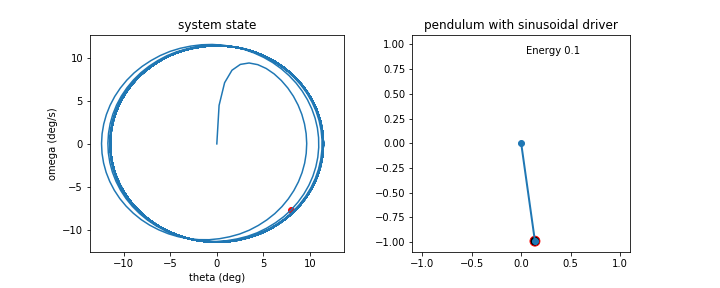

In [4]:
#cdf default

demoODE(A = 1, w = 1, Q = 0.2, theta0 = 0, omega0 = 0, title = 'Linearity ')

# linearity with different initial conditions
In the linearity condition, the system will eventually be drawn to the main attractor regardless of the chosen initial conditions.   

<IPython.core.display.Javascript object>


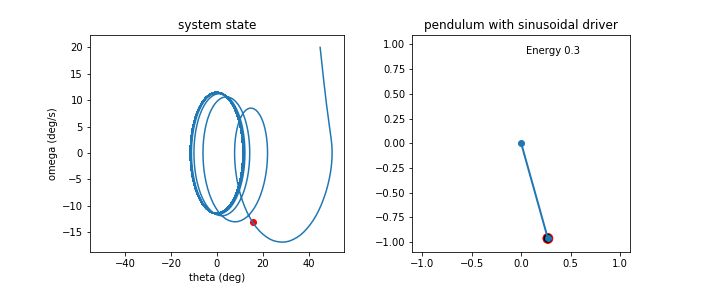

In [5]:
demoODE(A = 1, w = 1, Q = 0.2, theta0 = 45, omega0 = 20, title = 'Linearity different initial conditions')

# Two Attractors

This places the system in the regime described in the Fitzgerald web site in which the main attractor is assymetrical despite the perfect symmetry of the system.   It is also a place where you can visually see a small change in initial conditions causing very different results.  $\theta$'s initial value is 1.38 radians and results in a system with a main attractor that seems to point to the right.   Try increasing the value of theta0 from 80 to 81 degrees and note that the main attractor is now pointed in the opposite direction.  That's a first example of sensitivity to initial conditions studied in chaos theory.  Playing with the the initial parameters will allow you to find other boundary regions of the inital conditions.

<IPython.core.display.Javascript object>


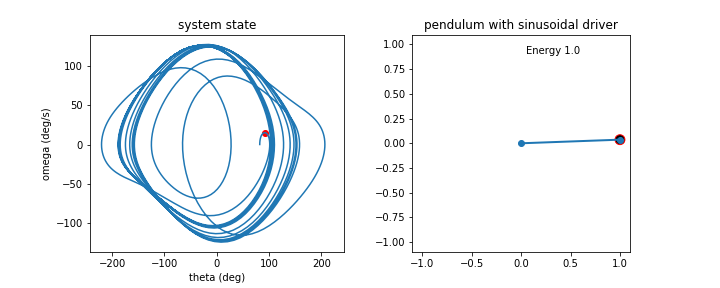

In [6]:
demoODE(A = 1.5, w = 2.0/3, Q = 1.33, theta0 = 82, omega0 = 0, title = 'Two Attractors')

# Bifurcation and Poincare plot
The poincare plot is shown below for the system as the quality factor is increased towards the first bifurcation.  the vertical line shows the current Q value.  Adjust the Q value to both sides of the bifurcation and you can see how it is in manifested in the trajectory.   The system now has a period twice that of the driving torque (2*\[Omega]) because it alternates between the two paths shown.  Adjust Q to it's maximum value of 1.36 to see the two trajectories pull from eachother.   You can change the poincare plot by altering Qmin and Qmax and clicking "redraw".   Rendering the poincare plot will take a few seconds.

In [7]:
numQpoints = 100
startInt = 150
endInt = 400
def poincarePlot(qMin, qMax, A, w, theta0, omega0, title = 'poincare plot'):
        
    #pendulum model
    def pend(t, y, A, w, Q):
        theta, omega = y
        dydt = [omega, (A*np.cos(w*t) - np.sin(theta)-(omega/Q))]
        return dydt
    
    period = 2*np.pi/w
    #solution points
    t = np.arange(startInt,startInt+50*period,period)
        
    #set initial conditions
    y0 = np.radians([theta0, omega0])
    
    qPoints = np.linspace(qMin,qMax,numQpoints)
    x = np.array([])
    y = []
    for q in qPoints:
        #sol = odeint(pend, y0, t, args=(A, w, q))
        sol = solve_ivp((lambda t, y: pend(t, y, A, w, q)), (0,t[-1]), y0, t_eval = t, rtol = 1e-4)
        omega = (sol['y'][1])
        #add points to scatter plot
        x = np.concatenate([x, q*np.ones(len(omega))])
        y = np.concatenate([y, omega])

    plt.figure()
    plt.scatter(x,y, s = 1)
    plt.title(title)


Traceback (most recent call last):
  File "/Users/Tim/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/Users/Tim/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/Users/Tim/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'
Traceback (most recent call last):
  File "/Users/Tim/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/Users/Tim/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/Users/Tim/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1499, in _stop
    self.event_source.remove_callback(self.

<IPython.core.display.Javascript object>


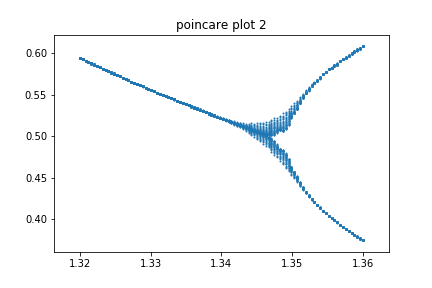

In [11]:
%matplotlib notebook
poincarePlot(1.32, 1.36, A = 1.5, w = 2.0/3, theta0 = 0, omega0 = 0, title = 'poincare plot 2')

<IPython.core.display.Javascript object>


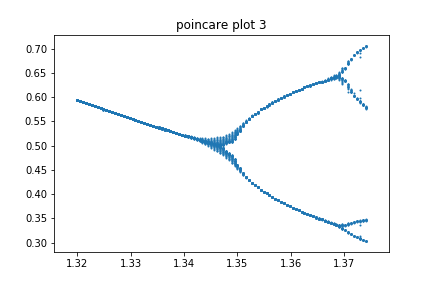

In [12]:
poincarePlot(1.32, 1.374, A = 1.5, w = 2.0/3, theta0 = 0, omega0 = 0, title = 'poincare plot 3')

<IPython.core.display.Javascript object>


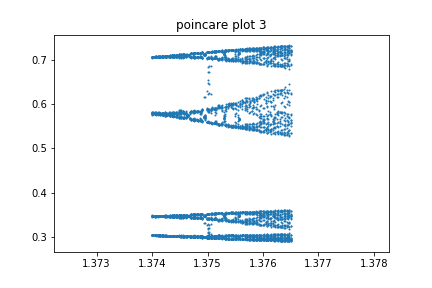

In [13]:
poincarePlot(1.374, 1.3765, A = 1.5, w = 2.0/3, theta0 = 0, omega0 = 0, title = 'poincare plot 3')